In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

In [22]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [23]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [49]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [25]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


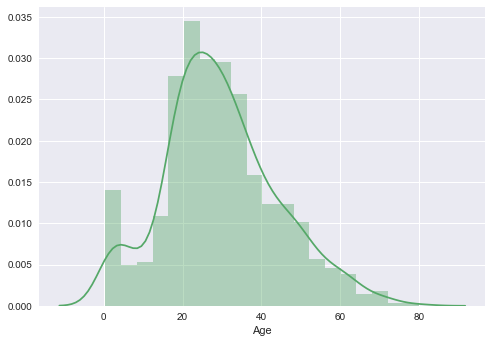

In [26]:
sns.distplot(train_data["Age"][train_data["Age"].isnull() == False])
plt.show()

In [75]:
train_data.Age[train_data["Age"].isnull()] = train_data["Age"].dropna().median()

/Users/akurniawan/.virtualenvs/ml-experiment/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


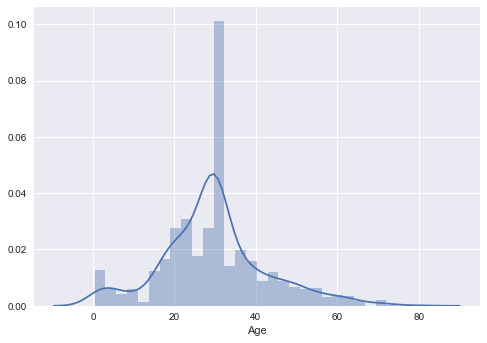

In [76]:
sns.distplot(train_data["Age"])
plt.show()

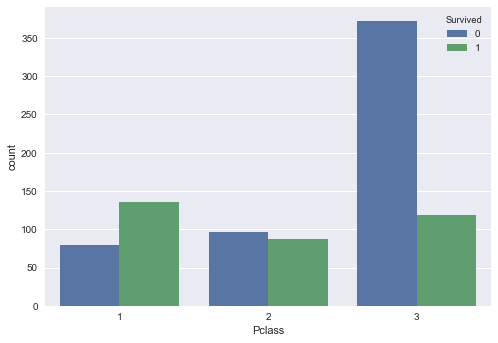

In [77]:
sns.countplot(data=train_data, x="Pclass", hue="Survived")
plt.show()

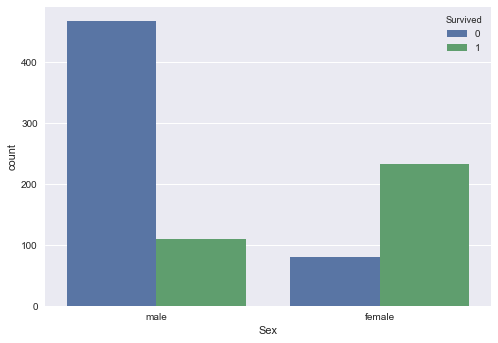

In [78]:
sns.countplot(data=train_data, x="Sex", hue="Survived")
plt.show()

In [79]:
train_data["Embarked"][train_data["Embarked"].isnull()] = train_data["Embarked"].dropna().mode().values

/Users/akurniawan/.virtualenvs/ml-experiment/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


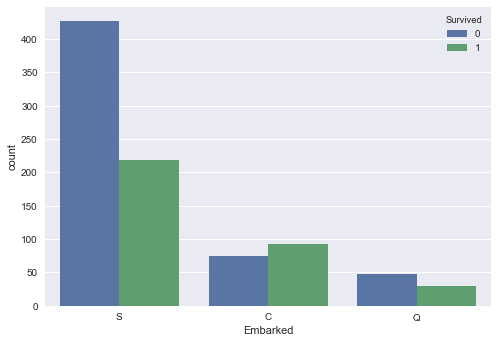

In [80]:
sns.countplot(data=train_data, x="Embarked", hue="Survived")
plt.show()

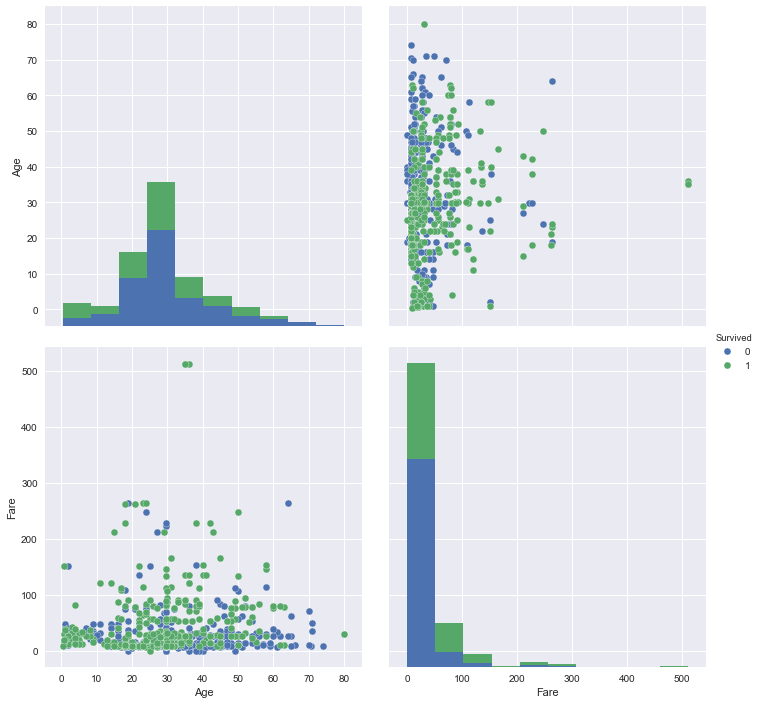

In [81]:
sns.pairplot(data=train_data, vars=["Age", "Fare"], hue="Survived", size=5)
plt.show()

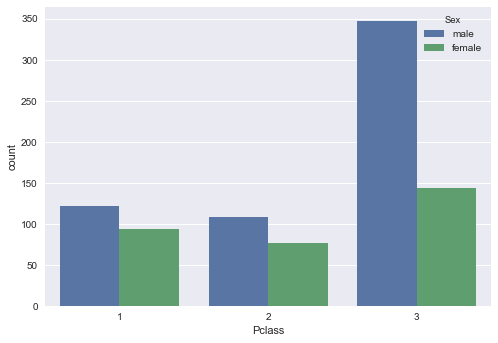

In [82]:
sns.countplot(data=train_data, x="Pclass", hue="Sex")
plt.show()

In [195]:
def data_preparation(data):
    new_data = data.copy()
    new_data["Embarked"][new_data["Embarked"].isnull()] = data["Embarked"].dropna().mode().values
    new_data["Age"][new_data["Age"].isnull()] = data["Age"].dropna().median()
    new_data["Fare"][new_data["Fare"].isnull()] = data["Fare"].dropna().median()
    
    new_data["Embarked"] = new_data["Embarked"].map({"C": 1, "Q": 2, "S": 3}).astype(int)
    new_data["Sex"] = new_data["Sex"].map({"male": 0, "female": 1})
    new_data["Rich_Old_Man"] = (new_data["Fare"] > 100.0) & (new_data["Age"] >= 40) & (new_data["Sex"] == 1)
    new_data["Rich_Young_Man"] = (new_data["Fare"] > 100.0) & (new_data["Age"] < 40) & (new_data["Sex"] == 1)
    new_data["Rich_Old_Woman"] = (new_data["Fare"] > 100.0) & (new_data["Age"] >= 40) & (new_data["Sex"] == 0)
    new_data["Rich_Young_Woman"] = (new_data["Fare"] > 100.0) & (new_data["Age"] < 40) & (new_data["Sex"] == 0)

    new_data.drop(["PassengerId", "Name", "Cabin", "Ticket"], axis=1, inplace=True)
    
    return new_data

def create_train_X_y(df):
    return (df.iloc[:, 1:], df.iloc[:, 0])
# new_train_data = new_train_data[["Survived", "Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Is_Rich", "Embarked"]]

In [196]:
new_train_data = data_preparation(train_data)

/Users/akurniawan/.virtualenvs/ml-experiment/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/Users/akurniawan/.virtualenvs/ml-experiment/lib/python2.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/akurniawan/.virtualenvs/ml-experiment/lib/python2.7/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [197]:
new_train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Rich_Old_Man,Rich_Young_Man,Rich_Old_Woman,Rich_Young_Woman
0,0,3,0,22.0,1,0,7.2500,3,False,False,False,False
1,1,1,1,38.0,1,0,71.2833,1,False,False,False,False
2,1,3,1,26.0,0,0,7.9250,3,False,False,False,False
3,1,1,1,35.0,1,0,53.1000,3,False,False,False,False
4,0,3,0,35.0,0,0,8.0500,3,False,False,False,False


In [198]:
new_train_data.iloc[:, 1:7]

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,0,22.000000,1,0,7.2500
1,1,1,38.000000,1,0,71.2833
2,3,1,26.000000,0,0,7.9250
3,1,1,35.000000,1,0,53.1000
4,3,0,35.000000,0,0,8.0500
5,3,0,29.699118,0,0,8.4583
6,1,0,54.000000,0,0,51.8625
7,3,0,2.000000,3,1,21.0750
8,3,1,27.000000,0,2,11.1333
9,2,1,14.000000,1,0,30.0708


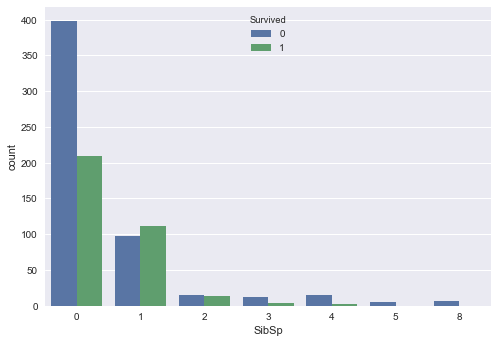

In [199]:
sns.countplot(data=train_data, x="SibSp", hue="Survived")
plt.show()

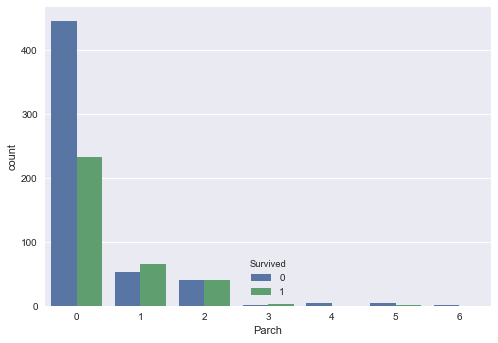

In [200]:
sns.countplot(data=train_data, x="Parch", hue="Survived")
plt.show()

In [201]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

X, y = create_train_X_y(new_train_data)

rf = ExtraTreesClassifier(n_estimators=100, random_state=123, n_jobs=-1)

In [202]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.7982062780269058

In [203]:
rf.feature_importances_

array([ 0.09519689,  0.29776387,  0.23043617,  0.04186027,  0.05183677,
        0.22871719,  0.0323487 ,  0.00312841,  0.01401327,  0.00215101,
        0.00254744])

In [204]:
rf.fit(X, y)

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=-1, oob_score=False, random_state=123,
           verbose=0, warm_start=False)

In [205]:
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [206]:
new_test_data = data_preparation(test_data)
X_result = new_test_data.values
print X_result

[[3 0 34.5 ..., False False False]
 [3 1 47.0 ..., False False False]
 [2 0 62.0 ..., False False False]
 ..., 
 [3 0 38.5 ..., False False False]
 [3 0 27.0 ..., False False False]
 [3 0 27.0 ..., False False False]]


/Users/akurniawan/.virtualenvs/ml-experiment/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/Users/akurniawan/.virtualenvs/ml-experiment/lib/python2.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/akurniawan/.virtualenvs/ml-experiment/lib/python2.7/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [207]:
predictions = rf.predict(X_result)

In [218]:
import csv

with open("result.csv", "wb") as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(["PassengerId", "Survived"])
    writer.writerows(zip(test_data["PassengerId"].values, predictions))